In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hardness-submission/submission.csv
/kaggle/input/playground-series-s3e25/sample_submission.csv
/kaggle/input/playground-series-s3e25/train.csv
/kaggle/input/playground-series-s3e25/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s3e25/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e25/test.csv")

In [3]:
train.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [4]:
test.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,10407,884.0,121.420000,35.36,5.28,82.561240,9.370384,2.298,1.9072,1.200000,0.461899,1.79459
1,10408,90.0,9.931960,18.00,5.60,39.568056,12.086300,2.868,1.6520,0.864000,0.476196,1.41194
2,10409,116.0,7.767992,11.60,4.80,23.231818,11.023840,2.644,1.7940,0.960000,0.499514,0.78834
3,10410,100.0,9.107996,10.00,4.80,20.298893,12.086300,2.828,1.6620,0.792000,0.495796,1.20466
4,10411,55.0,4.030000,11.00,4.00,22.977675,11.280950,2.455,1.7500,0.893333,0.476095,0.93456


In [5]:
train.describe()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.00000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,5203.00000,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,3004.38646,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2601.50000,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,5203.00000,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,7804.50000,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,10406.00000,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


In [6]:
# check for null values
train.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [7]:
# checking the datatype
train.dtypes

id                         int64
allelectrons_Total       float64
density_Total            float64
allelectrons_Average     float64
val_e_Average            float64
atomicweight_Average     float64
ionenergy_Average        float64
el_neg_chi_Average       float64
R_vdw_element_Average    float64
R_cov_element_Average    float64
zaratio_Average          float64
density_Average          float64
Hardness                 float64
dtype: object

In [8]:
#plotting the correlation plot
import matplotlib.pyplot as plt
import seaborn as sns

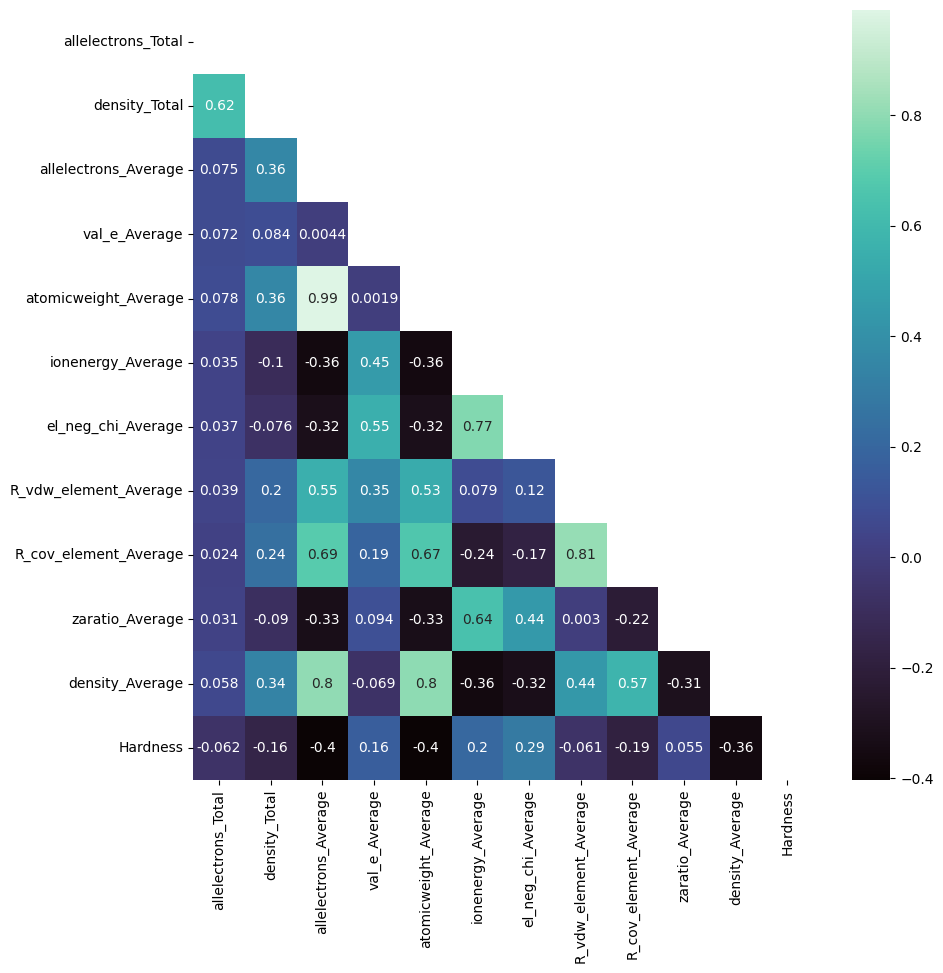

In [9]:
plt.figure(figsize=(10,10))
corr=train.drop(columns=['id']).corr()
sns.heatmap(corr,annot=True,cmap='mako',mask=np.triu(corr))
plt.show()

<Axes: xlabel='Hardness', ylabel='Count'>

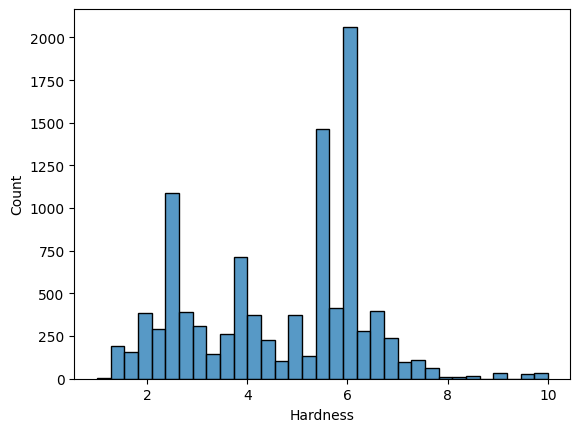

In [10]:
sns.histplot(train.Hardness)

In [11]:
train_data = train.drop(['id'], axis = 1)

In [12]:
train_data.columns

Index(['allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average', 'Hardness'],
      dtype='object')

In [13]:
! pip install h2o

In [14]:
import h2o
# We will be using default parameter Here with H2O init method
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpi219xl8o
  JVM stdout: /tmp/tmpi219xl8o/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpi219xl8o/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,"28 days, 4 hours and 45 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_jvg0ny
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.500 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [15]:
# convert pandas DataFrame into H2O Frame
train_df = h2o.H2OFrame(train_data)
# Describe  the train h20Frame
train_df.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:10407
Cols:12

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
type,real,real,real,real,real,real,real,real,real,real,real,real
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
mean,128.05351574260922,14.49134172136247,17.033222237776044,4.546788846423212,37.507702755534396,10.938308296628366,2.607662014097577,1.7313301970398327,0.9441322211659162,0.4933489059925393,2.1329837186509035,4.647125972902827
maxs,15300.0,643.0938035,67.0,6.0,167.39999999999995,15.24581,3.443,2.25,1.6158400761542124,0.82599,10.97,10.0
sigma,224.12377633813134,15.972876649669157,10.468734074452252,0.690863540339448,26.012312988485462,1.408275660128993,0.3349058369904789,0.19248110690369294,0.18001660357633925,0.0630800885816484,1.9366557597385576,1.6805253055230418
zeros,76,54,76,71,77,73,67,68,77,62,56,0
missing,0,0,0,0,0,0,0,0,0,0,0,0
0,100.0,0.8416109999999999,10.0,4.8,20.6125257,11.0881,2.766,1.732,0.86,0.4960699999999999,0.91457,6.0
1,100.0,7.558488,10.0,4.8,20.2988926326,12.04083,2.755,1.6309999999999998,0.91,0.492719,0.7176,6.5
2,76.0,8.885992,15.6,5.6,33.739258,12.0863,2.8280000000000003,1.7880000000000005,0.8640000000000001,0.481478,1.50633,2.5


In [16]:
test_data = test.drop(['id'], axis = 1)

In [17]:
test_df = h2o.H2OFrame(test_data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [18]:
test_df.head()

allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
884,121.42,35.36,5.28,82.5612,9.37038,2.298,1.9072,1.2,0.461899,1.79459
90,9.93196,18,5.6,39.5681,12.0863,2.868,1.652,0.864,0.476196,1.41194
116,7.76799,11.6,4.8,23.2318,11.0238,2.644,1.794,0.96,0.499514,0.78834
100,9.108,10,4.8,20.2989,12.0863,2.828,1.662,0.792,0.495796,1.20466
55,4.03,11,4,22.9777,11.281,2.455,1.75,0.893333,0.476095,0.93456
124,19.334,20.2,4.8,47.9857,11.6319,2.92667,1.765,0.98,0.468343,4.57578
66,10.5071,22.5,4,47.8025,9.1302,2.245,1.9,1.13,0.479965,2.22761
98,9.93196,9.2,4.8,19.8565,11.4653,2.868,1.738,0.919,0.49111,0.72489
220,43.23,24.5,5.5,53.4903,10.0743,2.225,1.99,0.945,0.47888,3.3354
120,17.624,15.6667,5,32.6271,12.0823,2.76667,1.5725,0.98,0.488163,2.16838


In [19]:
x = train_df.columns
y = 'Hardness'
# remove label classvariable from feature variable
x.remove(y)

In [20]:
from h2o.automl import H2OAutoML
# callh20automl  function 
aml = H2OAutoML(max_runtime_secs = 600,
                # exclude_algos =['DeepLearning'],
                seed = 1,
                # stopping_metric ='logloss',
                # sort_metric ='logloss',
                balance_classes = False,
                #project_name = Project1
)
# train model and record time % time 
aml.train(x = x, y = y, training_frame = train_df)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),13/90
# GBM base models (used / total),7/44
# XGBoost base models (used / total),6/38
# DRF base models (used / total),0/2
# DeepLearning base models (used / total),0/5
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [21]:

# View the H2O aml leaderboard
lb = aml.leaderboard
# Print all rows instead of 10 rows
lb.head(rows = lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_1_20231206_143557,1.19293,1.42307,0.877697,0.234537,1.42307
StackedEnsemble_BestOfFamily_4_AutoML_1_20231206_143557,1.19998,1.43995,0.883786,0.23575,1.43995
StackedEnsemble_AllModels_2_AutoML_1_20231206_143557,1.20372,1.44895,0.88586,0.236589,1.44895
StackedEnsemble_AllModels_1_AutoML_1_20231206_143557,1.20382,1.44919,0.885852,0.236581,1.44919
StackedEnsemble_BestOfFamily_3_AutoML_1_20231206_143557,1.20588,1.45414,0.886609,0.236837,1.45414
GBM_grid_1_AutoML_1_20231206_143557_model_31,1.20613,1.45475,0.895486,0.23718,1.45475
StackedEnsemble_BestOfFamily_2_AutoML_1_20231206_143557,1.20684,1.45646,0.888943,0.237195,1.45646
GBM_grid_1_AutoML_1_20231206_143557_model_15,1.20836,1.46013,0.900181,0.237577,1.46013
GBM_grid_1_AutoML_1_20231206_143557_model_28,1.20843,1.46031,0.89845,0.237441,1.46031
GBM_grid_1_AutoML_1_20231206_143557_model_4,1.21138,1.46743,0.899202,0.237731,1.46743


In [22]:
# Get the top model of leaderboard
se = aml.leader
se

key,value
Stacking strategy,cross_validation
Number of base models (used / total),13/90
# GBM base models (used / total),7/44
# XGBoost base models (used / total),6/38
# DRF base models (used / total),0/2
# DeepLearning base models (used / total),0/5
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [23]:
model = h2o.get_model('StackedEnsemble_AllModels_3_AutoML_1_20231202_41947')
Hardness = model.predict(test_df)
Hardness

H2OResponseError: Server error water.exceptions.H2OKeyNotFoundArgumentException:
  Error: Object 'StackedEnsemble_AllModels_3_AutoML_1_20231202_41947' not found for argument: key
  Request: GET /3/Models/StackedEnsemble_AllModels_3_AutoML_1_20231202_41947


In [ ]:
df = h2o.as_list(Hardness)
df.to_csv("submission.csv", index=False)

In [ ]:
id = test['id']
id.to_csv("id.csv", index=False)